Source:
https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Monthly-counts-per-hour/b2ak-trbp

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sktime

In [2]:
df = pd.read_csv("Pedestrians.csv", thousands = ",")
df.index = df.Date_Time.astype('datetime64')
df2 = df.drop_duplicates(subset = 'Date_Time', keep = False)

In [3]:
del df2['Sensor_ID']
del df2['Sensor_Name']
del df2['ID']
del df2['Date_Time']

In [4]:
df2.sort_index(inplace=True)

c:\Users\mi.martowicz\Anaconda3\lib\site-packages\pandas\core\frame.py:5582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


<AxesSubplot:xlabel='Date_Time', ylabel='Hourly_Counts'>

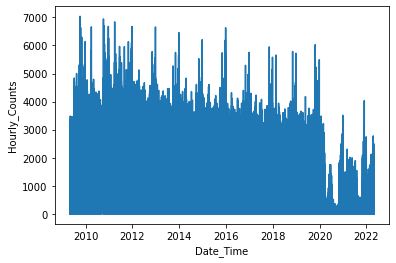

In [5]:
sns.lineplot(x=df2.index, y='Hourly_Counts', data=df2)

In [6]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52
2009-05-01 01:00:00,2009,May,1,Friday,1,34
2009-05-01 02:00:00,2009,May,1,Friday,2,19
2009-05-01 03:00:00,2009,May,1,Friday,3,14
2009-05-01 04:00:00,2009,May,1,Friday,4,15


In [7]:
df2.tail()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2022-04-30 19:00:00,2022,April,30,Saturday,19,489
2022-04-30 20:00:00,2022,April,30,Saturday,20,403
2022-04-30 21:00:00,2022,April,30,Saturday,21,310
2022-04-30 22:00:00,2022,April,30,Saturday,22,445
2022-04-30 23:00:00,2022,April,30,Saturday,23,244


In [8]:
import statsmodels.formula.api as sm

In [9]:
df2['Trend'] = range(1,len(df2)+1)

<ipython-input-9-34a127a3adb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Trend'] = range(1,len(df2)+1)


In [10]:
df2['LogPed'] = np.log(df2.Hourly_Counts+1)

<ipython-input-10-4007c2a90712>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogPed'] = np.log(df2.Hourly_Counts+1)


In [11]:
df2_in = df2[df2.index < "2020-01-01"]

In [12]:
model = sm.ols(formula="LogPed ~ Trend + C(Month) + C(Day) + C(Time)", data=df2_in)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LogPed   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.088e+04
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:26:20   Log-Likelihood:                -78736.
No. Observations:               92563   AIC:                         1.576e+05
Df Residuals:                   92521   BIC:                         1.580e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.7090      0.012    377.070      0.000       4.685       4.734
C(Month)[T.August]       -0.1836      0.009    -20.055      0.000      -0.202      -0.166
C(Month)[T.December]      0.2796      0.009     30.541      0.000       0.262       0.298
C(Month)[T.February]      0.0013      0.010      0.139      0.890      -0.017       0.020
C(Month)[T.January]      -0.0337      0.009     -3.598      0.000      -0.052      -0.015
C(Month)[T.July]         -0.1044      0.009    -11.400      0.000      -0.122      -0.086
C(Month)[T.June]         -0.1383      0.009    -14.981      0.000      -0.156      -0.120
C(Month)[T.March]         0.0082      0.009      0.878      0.380      -0.010       0.027
C(Month)[T.May]          -0.1393      0.009    -15.208      0.000      -0.157      -0.121
C(Month)[T.November]      0.0480      0.009      5.201      0.000       0.030       0.066
C(Month)[T.October]      -0.0879      0.009     -9.534      0.000      -0.106      -0.070
C(Month)[T.September]    -0.1385      0.009    -14.658      0.000      -0.157      -0.120
C(Day)[T.Monday]         -0.4196      0.007    -60.272      0.000      -0.433      -0.406
C(Day)[T.Saturday]       -0.0079      0.007     -1.136      0.256      -0.022       0.006
C(Day)[T.Sunday]         -0.2160      0.007    -31.024      0.000      -0.230      -0.202
C(Day)[T.Thursday]       -0.2361      0.007    -33.866      0.000      -0.250      -0.222
C(Day)[T.Tuesday]        -0.4256      0.007    -61.102      0.000      -0.439      -0.412
C(Day)[T.Wednesday]      -0.3539      0.007    -50.762      0.000      -0.368      -0.340
C(Time)[T.1]             -0.4888      0.013    -37.887      0.000      -0.514      -0.464
C(Time)[T.2]             -0.9306      0.013    -72.102      0.000      -0.956      -0.905
C(Time)[T.3]             -1.1426      0.013    -88.558      0.000      -1.168      -1.117
C(Time)[T.4]             -1.3148      0.013   -101.902      0.000      -1.340      -1.289
C(Time)[T.5]             -1.0567      0.013    -81.902      0.000      -1.082      -1.031
C(Time)[T.6]             -0.0964      0.013     -7.474      0.000      -0.122      -0.071
C(Time)[T.7]              0.8691      0.013     67.358      0.000       0.844       0.894
C(Time)[T.8]              1.7795      0.013    137.920      0.000       1.754       1.805
C(Time)[T.9]              2.2578      0.013    174.989      0.000       2.232       2.283
C(Time)[T.10]             2.7820      0.013    215.617      0.000       2.757       2.807
C(Time)[T.11]             3.1748      0.013    246.062      0.000       3.149       3.200
C(Time)[T.12]             3.6149      0.013    280.173      0.000       3.590       3.640
C(Time)[T.13]             3.7302      0.013    289.112      0.000       3.705       3.756
C(Time)[T.14]          

In [13]:
df2['LogPedFC'] = results.predict(df2)

<ipython-input-13-5c65ec6056f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogPedFC'] = results.predict(df2)


In [14]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPedFC
Date_Time,,,,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52,1,3.970292,4.569758
2009-05-01 01:00:00,2009,May,1,Friday,1,34,2,3.555348,4.080925
2009-05-01 02:00:00,2009,May,1,Friday,2,19,3,2.995732,3.639173
2009-05-01 03:00:00,2009,May,1,Friday,3,14,4,2.708050,3.427148
2009-05-01 04:00:00,2009,May,1,Friday,4,15,5,2.772589,3.254977


<AxesSubplot:xlabel='Date_Time'>

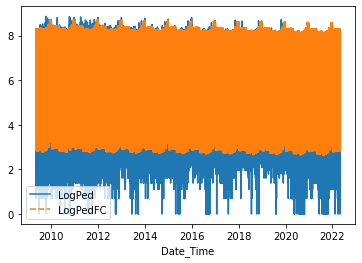

In [15]:
dfplot = df2.filter(['LogPed', 'LogPedFC'])
sns.lineplot(data=dfplot)

<AxesSubplot:xlabel='Date_Time'>

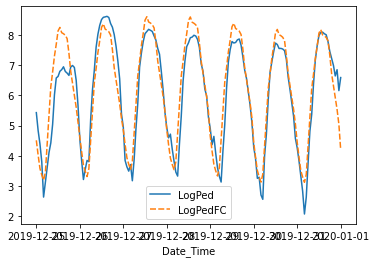

In [16]:
dfplot = df2.filter(['LogPed', 'LogPedFC'])[(df2.index >= '2019-12-25') & (df2.index <= '2020-01-01')]
sns.lineplot(data=dfplot)

In [17]:
df3 = df2[df2.index < '2020-01-01']

In [18]:
insample_err = df3.LogPed - df3.LogPedFC

In [19]:
insample_err

Date_Time
2009-05-01 00:00:00   -0.599466
2009-05-01 01:00:00   -0.525577
2009-05-01 02:00:00   -0.643441
2009-05-01 03:00:00   -0.719098
2009-05-01 04:00:00   -0.482388
                         ...   
2019-12-31 19:00:00    0.501944
2019-12-31 20:00:00    0.677537
2019-12-31 21:00:00    0.724958
2019-12-31 22:00:00    1.313122
2019-12-31 23:00:00    1.110838
Length: 92563, dtype: float64

In [20]:
df2[df2.index == '2022-01-01']

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPedFC
Date_Time,,,,,,,,,
2022-01-01,2022,January,1,Saturday,0,286,110108,5.659482,4.523659


In [21]:
errsmpl = np.random.choice(insample_err, 10000)

In [22]:
len(errsmpl)

10000

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        9.000e+00, 4.000e+00, 5.000e+00, 1.300e+01, 1.300e+01, 2.800e+01,
        7.600e+01, 1.840e+02, 4.890e+02, 8.550e+02, 1.820e+03, 3.184e+03,
        1.815e+03, 8.250e+02, 3.310e+02, 1.700e+02, 1.090e+02, 4.200e+01,
        1.300e+01, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-5.31978221, -5.01488018, -4.70997816, -4.40507614, -4.10017412,
        -3.7952721 , -3.49037008, -3.18546806, -2.88056604, -2.57566401,
        -2.27076199, -1.96585997, -1.66095795, -1.35605593, -1.05115391,
        -0.74625189, -0.44134987, -0.13644785,  0.16845418,  0.4733562 ,
         0.77825822,  1.08316024,  1.38806226,  1.69296428,  1.9978663 ,
         2.30276832,  2.60767035,  2.91257237,  3.21747439,  3.52237641,
         3.82727843]),
 <BarContainer object of 30 artists>)

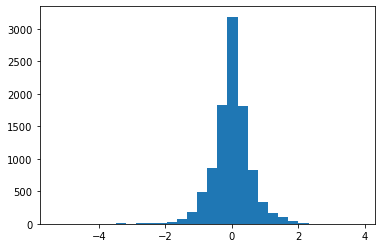

In [23]:
import matplotlib.pyplot as plt
plt.hist(errsmpl, bins = 30)

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        7.0000e+00, 1.1000e+01, 1.0000e+01, 2.3000e+01, 2.4000e+01,
        5.3000e+01, 5.7000e+01, 9.3000e+01, 1.5700e+02, 5.3900e+02,
        2.0710e+03, 5.9260e+03, 1.4690e+04, 3.6104e+04, 2.2066e+04,
        6.8270e+03, 2.4150e+03, 1.0130e+03, 3.3300e+02, 7.9000e+01,
        3.1000e+01, 1.4000e+01, 6.0000e+00, 7.0000e+00, 2.0000e+00]),
 array([-7.52618875, -7.12220239, -6.71821603, -6.31422968, -5.91024332,
        -5.50625696, -5.1022706 , -4.69828424, -4.29429788, -3.89031152,
        -3.48632516, -3.0823388 , -2.67835245, -2.27436609, -1.87037973,
        -1.46639337, -1.06240701, -0.65842065, -0.25443429,  0.14955207,
         0.55353843,  0.95752478,  1.36151114,  1.7654975 ,  2.16948386,
         2.57347022,  2.97745658,  3.38144294,  3.7854293 ,  4.18941566,
         4.59340201]),
 <BarContainer object of 30 artists>)

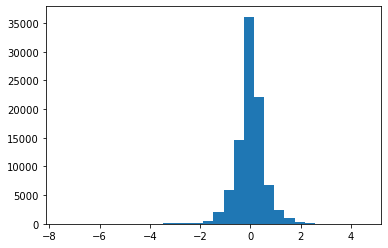

In [24]:
plt.hist(insample_err, bins = 30)

In [25]:
fc_distrib = df2[df2.index == '2022-01-01'].LogPedFC.values + errsmpl

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        9.000e+00, 4.000e+00, 5.000e+00, 1.300e+01, 1.300e+01, 2.800e+01,
        7.600e+01, 1.840e+02, 4.890e+02, 8.550e+02, 1.820e+03, 3.184e+03,
        1.815e+03, 8.250e+02, 3.310e+02, 1.700e+02, 1.090e+02, 4.200e+01,
        1.300e+01, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.79612293, -0.49122091, -0.18631889,  0.11858313,  0.42348515,
         0.72838717,  1.03328919,  1.33819122,  1.64309324,  1.94799526,
         2.25289728,  2.5577993 ,  2.86270132,  3.16760334,  3.47250536,
         3.77740739,  4.08230941,  4.38721143,  4.69211345,  4.99701547,
         5.30191749,  5.60681951,  5.91172153,  6.21662355,  6.52152558,
         6.8264276 ,  7.13132962,  7.43623164,  7.74113366,  8.04603568,
         8.3509377 ]),
 <BarContainer object of 30 artists>)

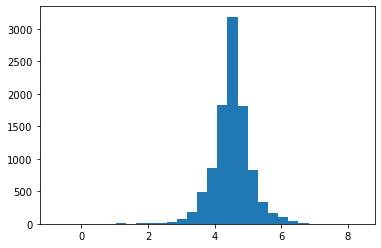

In [26]:
plt.hist(fc_distrib, bins = 30)

In [27]:
np.min(fc_distrib)

-0.7961229324986219

In [28]:
np.exp(np.min(fc_distrib))

0.4510744242884521

(array([4.570e+02, 2.110e+03, 3.844e+03, 1.919e+03, 7.400e+02, 3.370e+02,
        1.630e+02, 1.100e+02, 7.300e+01, 5.100e+01, 4.800e+01, 3.800e+01,
        2.000e+01, 2.400e+01, 1.100e+01, 1.100e+01, 9.000e+00, 5.000e+00,
        6.000e+00, 6.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

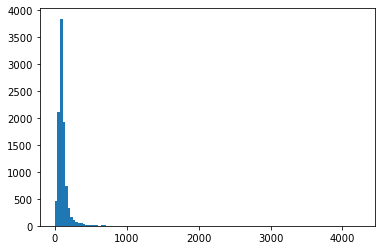

In [29]:
plt.hist(np.exp(fc_distrib), bins = 120)

In [30]:
np.sum(np.abs(errsmpl) >= 532) / len(errsmpl)

0.0

In [31]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPedFC
Date_Time,,,,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52,1,3.970292,4.569758
2009-05-01 01:00:00,2009,May,1,Friday,1,34,2,3.555348,4.080925
2009-05-01 02:00:00,2009,May,1,Friday,2,19,3,2.995732,3.639173
2009-05-01 03:00:00,2009,May,1,Friday,3,14,4,2.708050,3.427148
2009-05-01 04:00:00,2009,May,1,Friday,4,15,5,2.772589,3.254977
